#  <span style="text-align=center; color:DarkMagenta; font-family:Georgia; font-size:1.2em;"> **   _ M1- TP1 Apprentissage Automatique et Numérique_** </span>

# <span style="color:green; font-family:Georgia; font-size:1.5em;">1. Introduction

<span style="color:black; font-family:Georgia; font-size:1.3em;">Les objectifs de ce premier TP sont :</span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Exploration et Visualisation de données avec la bibliothèque __Pandas__</span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Implémentation d'une régression Linéaire Multiple avec la méthode de __moindres carrés__</span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire : </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Formule : $ y=\sum_{i=1}^N w_i x_i + b  $  </span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire Simple : </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> $ N = 1 $ donc $ y= \beta_1 x_1 + \beta_0  $ </span>



# <span style="color:green; font-family:Georgia; font-size:1.5em;">2. Jeux de données 

<span style="font-family:Georgia; font-size:1.2em;">House Pricing is dataset describing the sale of individual residential property from 2006 to 2010. It contains a large number of explanatory variables involved in assessing home values. This data set gives you the opportunity to display the skills they had learned within the class.</span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will use the _House Pricing_ dataset for a regression project with a <span style="color:red">simple linear regression </span> </span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will implement the  <span style="color:red"> Least Squares Method </span> to learn a prediction  model for the _House Pricing_ dataset</span>





# <span style="color:green; font-family:Georgia; font-size:1.5em;">3. Exploration  et Visualisation de données </span>
## <span style="color:brown; font-family:Gemesorgia; font-size:1.3em;">3.1 Objectifs </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Importation de la base de données avec pandas </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Calcul de la correlation entre les variables explicatives et la variable expliquée _SalePrice_  </span>
3. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Choisir la variable explicative (exogène) </span>


In [2]:
# Todo
# calculate the correlation between salePrice and all variables
# Keep the two most correlated variables to test them with the simple linear regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sum,sqrt
%matplotlib inline

## <span style="color:brown; font-family:times; font-size:1.3em;">3.2 Load the training and testing data </span> 

In [3]:
houses_train = pd.read_csv('train.csv')
houses_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
houses_test= pd.read_csv('test.csv')
houses_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1200          20       RL         75.0    11235   Pave   NaN      Reg   
1  1201          20       RL         71.0     9353   Pave   NaN      Reg   
2  1202          60       RL         80.0    10400   Pave   NaN      Reg   
3  1203          50       RM         50.0     6000   Pave   NaN      Reg   
4  1204          20       RL         75.0     9750   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     10   
1         Lvl    AllPub  ...        0    NaN   NaN        Shed       0      7   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      3   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     10   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2006        WD         Normal     148000  
1   2006       Oth        Abnorml     116050  
2   2009        WD         Normal     197900  
3   2009        WD         Normal     117000  
4   2009        WD         Normal     213000  

[5 rows x 81 columns]

In [5]:
houses_train.dtypes.value_counts() # .get_dtype_counts() est obsolète depuis 0.25.0 on remplace par .dtypes.value_counts()
houses_train.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1199.000000  1199.000000   989.000000    1199.000000  1199.000000   
mean    600.000000    57.105922    70.081901   10558.848207     6.106756   
std     346.265794    42.686374    23.713505   10623.548705     1.382678   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     300.500000    20.000000    59.000000    7560.000000     5.000000   
50%     600.000000    50.000000    70.000000    9430.000000     6.000000   
75%     899.500000    70.000000    80.000000   11616.000000     7.000000   
max    1199.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1199.000000  1199.000000   1199.000000  1193.000000  1199.000000  ...   
mean      5.568807  1971.357798   1984.992494   104.006706   444.801501  ...   
std       1.120485    30.059978     20.535058   183.605510   440.161545  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   385.000000  ...   
75%       6.000000  2000.000000   2004.000000   167.000000   712.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  2260.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1199.000000  1199.000000    1199.000000  1199.000000  1199.000000   
mean     95.216013    45.986656      22.196831     3.656380    14.993328   
std     124.055413    65.696803      61.529650    30.003428    54.789200   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     168.000000    67.500000       0.000000     0.000000     0.000000   
max     857.000000   523.000000     552.000000   508.000000   410.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1199.000000   1199.000000  1199.000000  1199.000000    1199.000000  
mean      1.910759     40.487073     6.308590  2007.812344  181442.497081  
std      33.162113    482.523289     2.672094     1.318539   81098.986765  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129900.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163900.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     648.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## <span style="color:brown; font-family:times; font-size:1.3em;">3.3 Variables Correlation with SalePrice </span>
<span style="color:black; font-family:Georgia; font-size:1.3em;">In this section we will search for the two most correlated variables.</span>


In [6]:
def valeurs(X,dataframe):     #Retourne les valeurs d'une colonne de dataFrame, sous forme de numpy.Array
    return dataframe [X].values

#On regroupe les coefficients de correlation dans le tableau coefAll
coefAll= houses_train.corr(method ='pearson') # Dataframe des coefficients entre eux

#Le Plus correlé avec SalePrice
coefWithSalePrice = (coefAll["SalePrice"]).drop(['Id', 'SalePrice']) #On récupère la colonne SalePrice en laissant Id et SalePrice
lePlusCorrelé = [coefWithSalePrice.abs().idxmax(),coefWithSalePrice.abs().max()] #le plus corrélé est celui donc la valeur absolue est la plus grande

print(lePlusCorrelé)  #Son nom est 'OverallQual'

#Le Plus second plus correlé avec SalePrice
coefWithSalePrice = (coefWithSalePrice).drop(['OverallQual']) #On retire 'OverallQual' et on recommence
leSecondCorrelé = [coefWithSalePrice.abs().idxmax(),coefWithSalePrice.abs().max()] # Le plus correlé est donc le maximum de ce qui reste

print(leSecondCorrelé,"\n\n")  #Son nom est 'GrLivArea'

OverallQual = valeurs ('OverallQual',houses_train)  # est une variable explicative
print("OverallQual = ",OverallQual)

GrLivArea = valeurs ('GrLivArea',houses_train)     # est une variable explicative
print("GrLivArea = ",GrLivArea)

SalePrice = valeurs ('SalePrice',houses_train)   # est le y à expliquer
print("SalePrice = ",SalePrice,"\n\n")



['OverallQual', 0.7894380947520541]
['GrLivArea', 0.7403659162364662] 


OverallQual =  [7 6 7 ... 7 7 7]
GrLivArea =  [1710 1262 1786 ... 1863 1690 1212]
SalePrice =  [208500 181500 223500 ... 219210 144000 178000] 




## <span style="color:brown; font-family:times; font-size:1.3em;">3.4 Plot SalePrice    </span> 

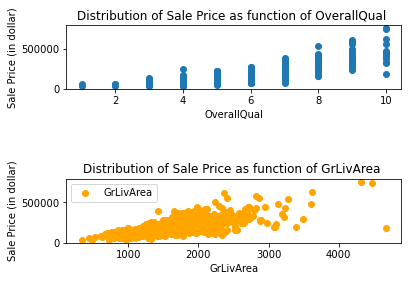

In [7]:
# Todo
# plot the SalePrices as function of your 2 variables (most correlated)
#On plot SalePrice en fonction de OverallQual
plt.subplot(3,1,1)
plt.title("Distribution of Sale Price as function of OverallQual ")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price (in dollar)")
plt.scatter(OverallQual,SalePrice,label='OverallQual')
#On plot SalePrice en fonction de GrLivArea
plt.subplot(3,1,3)
plt.title("Distribution of Sale Price as function of GrLivArea ")
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price (in dollar)")
plt.scatter(GrLivArea,SalePrice,color='orange',label='GrLivArea')
plt.legend()

# <span style="color:green; font-family:Georgia; font-size:1.5em;">4. Regression Lineaire Simple (Python) </span>


In [8]:
# Todo 
def moyenne(X,dataFrame):
    description = dataFrame.describe()
    return description.at["mean",X] 

def varianceX(X,Y):
    matriceCovariance = np.cov(X,Y,ddof=0)  # matrice de covariance matrice (2,2) qui contient la variance de x, y et deux fois la covariance de xy
    return matriceCovariance[0,0]          #Ajouter ddof = 0, sinon calcul en fonction de n-1
    
def varianceY(X,Y):                          #On récupère la variance dans la matrice de covariance
    matriceCovariance = np.cov(X,Y,ddof=0) 
    return matriceCovariance[1,1]

def covariance(X,Y):                         #On récupère la variance dans la matrice de covariance
    matriceCovariance = np.cov(X,Y,ddof=0) 
    return matriceCovariance[0,1]

# Estimation de beta_1
def beta1(X,Y):
    return covariance(X,Y) / varianceX(X,Y)

#Modèle avec OverallQual
print("varX avec OverallQual = ",varianceX(OverallQual,SalePrice)," CovXY = ",covariance(OverallQual,SalePrice))
beta1Over = beta1(OverallQual,SalePrice)
print("beta1 avec OverallQual = ",beta1Over)

#Modèle avec GrLivArea
print("\nvarX avec OverallQual = ",varianceX(GrLivArea,SalePrice)," CovXY = ",covariance(GrLivArea,SalePrice))
beta1GrL = beta1(GrLivArea,SalePrice)
print("beta1 avec GrLivArea = ",beta1GrL)



varX avec OverallQual =  1.9102045699745642  CovXY =  88448.86519903645
beta1 avec OverallQual =  46303.34708089103

varX avec OverallQual =  267668.9471724072  CovXY =  31051290.785898183
beta1 avec GrLivArea =  116.00632465557486


In [9]:
# Todo 
# Estimation de \beta_0
def beta0(X,Y):
    return np.mean(Y) - np.mean(X)*beta1(X,Y)  
    
#Modèle avec OverQual
beta0Over = beta0(OverallQual,SalePrice) 
print("beta0 avec OverallQual = ",beta0Over)
#Modèle avec GrLivArea
beta0GrL = beta0(GrLivArea,SalePrice)  
print("beta0 avec GrLivArea = ",beta0GrL)


beta0 avec OverallQual =  -101320.72837888583
beta0 avec GrLivArea =  6379.277919203305


In [14]:
# Calculez le coeffecient de détermination R2 
def estimate(X,b0,b1):
    return b0 + X*b1
# coeffecient de détermination R2 
def R2(Y,Ye):
    sCE = sum ( (Ye - np.mean(Y))**2 )
    sCT = sum ( (Y - np.mean(Y))**2 )
    return sCE/sCT

#OverallQual
SalePriceTest =valeurs('SalePrice',houses_test) #Valeur de test
print("OverallQual R2 = ",R2(SalePrice,estimate(OverallQual,beta0Over,beta1Over))) 
#GrLivArea
print("GrLivArea R2 = ",R2(SalePrice,estimate(GrLivArea,beta0GrL,beta1GrL))) 
# On remarque que le modèle avec OverallQual a un pouvoir prédictif plus fort que le second


OverallQual R2 =  0.6232125054457522
GrLivArea R2 =  0.5481416899246623


OverallQual R2 sur les valeurs de tests =  0.8079853145075745
GrLivArea R2 sur les valeurs de tests=  0.8381147313075326


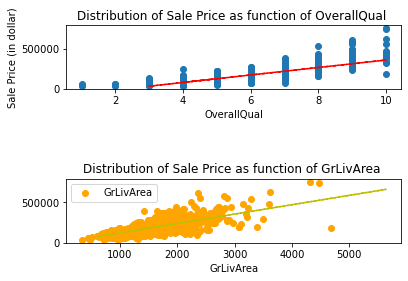

In [24]:
# prédire les valeurs sur les données de Test
#Calcul de ye avec  OverallQual
OverallQualTest = valeurs('OverallQual',houses_test) #Valeur de test
SalePriceEstimateOver = estimate(OverallQualTest,beta0Over,beta1Over)  # On déduit SalePrice estimé avec beta0 et beta1


#Calcul de ye estimée GrLivArea
GrLivAreaTest = valeurs('GrLivArea',houses_test) #Valeur de test
SalePriceEstimateGrL = estimate(GrLivAreaTest,beta0GrL,beta1GrL)   # On déduit SalePrice estimé avec beta0 et beta1

# Todo
# plot the SalePrices as function of your 2 variables (most correlated)
# add x label and Y label, the values and the scatter

#OverallQual

print("OverallQual R2 sur les valeurs de tests = ",R2(SalePriceTest,estimate(OverallQualTest,beta0Over,beta1Over))) 
#GrLivArea
print("GrLivArea R2 sur les valeurs de tests= ",R2(SalePriceTest,estimate(GrLivAreaTest,beta0GrL,beta1GrL))) 



plt.subplot(3,1,1)
plt.title("Distribution of Sale Price as function of OverallQual ")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price (in dollar)")
plt.scatter(OverallQual,SalePrice)
plt.plot(OverallQualTest,SalePriceEstimateOver,'--r')

plt.subplot(3,1,3)
plt.title("Distribution of Sale Price as function of GrLivArea ")
plt.xlabel("GrLivArea")
plt.scatter(GrLivArea,SalePrice,color='orange',label="GrLivArea")
plt.plot(GrLivAreaTest,SalePriceEstimateGrL,'--y')
plt.legend()

# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Evaluation du  modèle (RMSE)
  </span>


<span style="font-family:Georgia; font-size:1.2em;">La  racine  carrée  de l’erreur quadratique moyenne (RMSE) est une   autre  mesure  des  erreurs  de  prévision. La RMSE est définie par : $ RMSE = \sqrt{ \frac{1}{n} \sum (pred - y)^{2}} $.
</span>

<span style="font-family:Georgia; font-size:1.2em;">
Cette  mesure  pénalise  d'avantage  les  erreurs  importantes 
</span>

In [16]:
# Calculez la RMSE de votre modèle sur les données de test
def RMSE(Y,Ye):
    n = Y.size
    ecartCarre = (Ye - Y)**2
    return sqrt( (1/n) * (sum(ecartCarre) ))

#OverallQual
RMSE1 = RMSE(SalePriceTest,SalePriceEstimateOver)
print(" OverallQual RMSE = ", RMSE1)  
#GrLivArea
RMSE2 = RMSE(SalePriceTest,SalePriceEstimateGrL)
print(" GrLivArea RMSE = ", RMSE2)

#le RMSE est très sensible aux outliners, ce qui explique les résultats élevés, mais on ne peut pas les comparerAve


 OverallQual RMSE =  42897.37104035707
 GrLivArea RMSE =  63665.38199956484


# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Pour aller plus loin </span>

<span style="font-family:Georgia; font-size:1.2em;">  
La standardisation des données consiste à centrer-réduire la matrice de fonctions caractéristiques  $X$ en retranchant pour chaque vecteur $X^{j}, j \in [1, N]$ sa moyenne et en divisant par son écart-type.
</span>


<span style="font-family:Georgia; font-size:1.2em;">
La formule d’usage est alors : $ ~~~~~~~~~~~  \forall j \in [1, N] ~~~~ X^{j} = \frac{X^{j}_{std} - \mu_{j}}{ \sigma^{2}_{j}}$

</span>

OverallQual beta1 =  0.7894380947520557
OverallQual beta0 =  1.3325773293370831e-17
GrLivArea beta1 =  0.7403659162364662
GrLivArea beta0 =  -9.64437510571877e-17

OverallQualCentréeReduit R2 =  0.6232125054457566
GrLivAreaCentréeReduit R2 =  0.548141689924663
OverallQual RMSE =  0.5942423558888456
GrLivArea RMSE =  0.8375526031942268
261


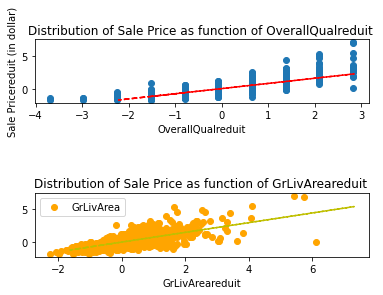

In [22]:
# Todo :
##  refaire le calcul des paramètres après un prétraitement sur les données d'apprentissage

##  1.  Centrer la variable --> soustraire son espérance à chacune de ses valeurs initiales
def centrage (X):
    return (X - np.mean(X))

centrageOverAllQual  = centrage(OverallQual)
centrageOverAllQualTest = centrage(OverallQualTest)
centrageGrLivArea  = centrage(GrLivArea)
centrageGrLivAreaTest  = centrage(GrLivAreaTest)
SalePriceCentrée = centrage(SalePrice)
SalePriceTestCentrée = centrage(SalePriceTest)

##  2.  Réduire la variable --> diviser toutes ses valeurs par son écart type.
def reduction(centrage,variance):
    return (centrage/sqrt(variance))

reductionOverAllQual = reduction(centrageOverAllQual,varianceX(OverallQual,SalePrice))
reductionOverAllQualTest = reduction(centrageOverAllQualTest,varianceX(OverallQualTest,SalePriceTest))
reductionGrLivArea = reduction(centrageGrLivArea,varianceX(GrLivArea,SalePrice) )
reductionGrLivAreaTest = reduction(centrageGrLivAreaTest,varianceX(GrLivAreaTest,SalePriceTest) )
SalePriceReduit = reduction(SalePriceCentrée,varianceY(GrLivArea,SalePrice))
SalePriceTestReduit = reduction(SalePriceTestCentrée,varianceY(GrLivAreaTest,SalePriceTest))

##    Soient  μ  l’espérance et σ l’écart-type des valeurs d’une variable aléatoire.
##    Centrer-réduire l’une de ses valeurs V revient alors à calculer : 
##          (V - μ ) / σ 
## --------------------------
##  3. re-éstimer les paramètre de modèle 

beta1Over2 = beta1(reductionOverAllQual,SalePriceReduit)
beta1GrL2 = beta1(reductionGrLivArea,SalePriceReduit)


beta0Over2 = beta0(reductionOverAllQual,SalePriceReduit)
beta0GrL2 = beta0(reductionGrLivArea,SalePriceReduit)
print("OverallQual beta1 = ",beta1Over2 )
print("OverallQual beta0 = ",beta0Over2 )
print("GrLivArea beta1 = ",beta1GrL2 )
print("GrLivArea beta0 = ",beta0GrL2 )

##  4. re-calculer la précision du modèle sur les données de test.
def estimate(X,b0,b1):
    return b0 + X*b1

SalePriceEstimateOver2 = estimate(reductionOverAllQualTest,beta0Over2,beta1Over2) 
print("\nOverallQualCentréeReduit R2 = ",R2(SalePriceTestReduit,SalePriceEstimateOver2)) 
#On se rend compte compte que R2 baisse, le pouvoir prédictif du modèle n'est pas aussi fort que précedemment
SalePriceEstimateGrL2 = estimate(reductionGrLivAreaTest,beta0GrL2,beta1GrL2) 
print("GrLivAreaCentréeReduit R2 = ",R2(SalePriceTestReduit,SalePriceEstimateGrL2)) 

#OverallQual
RMSE1 = RMSE(SalePriceTestReduit,SalePriceEstimateOver2)
print("OverallQual RMSE = ", RMSE1)  

#GrLivArea
RMSE2 = RMSE(SalePriceTestReduit,SalePriceEstimateGrL2)
print("GrLivArea RMSE = ", RMSE2)

plt.subplot(3,1,1)
plt.title("Distribution of Sale Price as function of OverallQualreduit ")
plt.xlabel("OverallQualreduit")
plt.ylabel("Sale Pricereduit (in dollar)")
plt.scatter(reductionOverAllQual,SalePriceReduit)
plt.plot(reductionOverAllQualTest,SalePriceEstimateOver2,'--r')

plt.subplot(3,1,3)
plt.title("Distribution of Sale Price as function of GrLivAreareduit ")
plt.xlabel("GrLivAreareduit")
plt.scatter(reductionGrLivArea,SalePriceReduit,color='orange',label="GrLivArea")
plt.plot(reductionGrLivAreaTest,SalePriceEstimateGrL2,'--y')
plt.legend()

print(SalePriceTest.size)

In [18]:
# Avec la centralisation, les R2 sur les valeurs de test changent et sont égaux à ceux des modèles d'apprentissage. On peut enfin comparer les 2 RMSE, ils ont été mis à la même échelle.
#On remarque également que le modèle créé avec OverallQuall génère moins d'erreurs.

# <span style="color:green; font-family:Georgia; font-size:1.5em;">END</span>